# Lag in reporting of Coronavirus Deaths in England - some data.

The BBC has an [article](https://www.bbc.co.uk/news/health-52167016) "Warning over daily death figures", noting "Experts are warning against over-interpreting daily figures of people dying with Covid-19, since they often reflect reporting delays.
Spikes or dips may in part reflect bottlenecks in the reporting system, rather than real changes in the trend."

The data for England is available as a series of spreadsheets at https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-daily-deaths/ . We can use this to investigate this issue, and help us understand the risk in thinking of the figures as "today's deaths" - which they are not.

This post is written using an approach to data analytics where the whole analysis script is made available, here as a [Jupyter Notebook](https://jupyter.org),
so that the work can be scrutinised and errors found quickly. Please follow along if you are used to this kind of thing. If not, try taking one of the courses run by [Data Carpentry](https://datacarpentry.org)

You can launch this notebook and edit the code yourself with [Binder](https://turing.mybinder.org) using the link just below.

 [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jamespjh/Covid19-Data-Personal/master?filepath=England_Covid19_Deaths_Datawrangling.ipynb)

## Part one - obtain the data

In [35]:
import datetime, pandas, dateutil

The data is available from the second of April to the present day - let's get this series of days as a python list.

In [36]:
first_date = datetime.date(2020,4,2)

In [37]:
last_date = datetime.date.today()

In [38]:
def dates(date, last_date):
   while date <= last_date:
        yield date
        date += datetime.timedelta(days=1)
   return

In [39]:
list(dates(first_date, last_date))

[datetime.date(2020, 4, 2),
 datetime.date(2020, 4, 3),
 datetime.date(2020, 4, 4),
 datetime.date(2020, 4, 5),
 datetime.date(2020, 4, 6),
 datetime.date(2020, 4, 7),
 datetime.date(2020, 4, 8),
 datetime.date(2020, 4, 9),
 datetime.date(2020, 4, 10),
 datetime.date(2020, 4, 11),
 datetime.date(2020, 4, 12),
 datetime.date(2020, 4, 13),
 datetime.date(2020, 4, 14),
 datetime.date(2020, 4, 15),
 datetime.date(2020, 4, 16),
 datetime.date(2020, 4, 17),
 datetime.date(2020, 4, 18),
 datetime.date(2020, 4, 19),
 datetime.date(2020, 4, 20),
 datetime.date(2020, 4, 21),
 datetime.date(2020, 4, 22),
 datetime.date(2020, 4, 23)]

The URLs to download from are constructed with a certain pattern which depends on the date. Thankfully, a nice and stable pattern.

In [40]:
def format_download(date):
    prefix = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"
    
    month = date.strftime("%m")
    monthname = date.strftime("%B")
    day_figure = str(int(date.strftime("%d")))
    date_dependent_part = f"{month}/COVID-19-daily-announced-deaths-{day_figure}-{monthname}-2020.xlsx"
    return prefix+date_dependent_part

In [41]:
download_strings = [format_download(date) for date in dates(first_date, last_date)]
download_strings

['https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-2-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-3-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-4-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-5-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-6-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-7-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-8-April-2020.xlsx',
 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/04/COVID-19-daily-announced-deaths-9-Ap

We can now download the notebook, but without further datawrangling, it looks a bit messy...

In [42]:
pandas.read_excel(format_download(first_date))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,Title:,COVID-19 daily deaths announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Summary:,Deaths of patients who have died in hospitals ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Period:,5pm 31 March 2020 - 5pm 01 April 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Source:,COVID-19 Patient Notification System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Basis:,Provider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Published:,2020-04-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Revised:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Status:,Published,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Contact:,england.nhsdata@nhs.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part two - clean the data

As expected, the spreadsheets are not quite consistently arranged across all the copies. 
Incidentally, it is quite proper that the burden of data wrangling should fall on the data science community at this time.
While in the long run, I'd love it if we were all better at consistent reporting of national data over clean APIs,
now is not the time to add burdens to the NHS!

So, we need to convert the data into a consistent format.

In [43]:
def stabilise_date_datatype(content):
    try:
        return dateutil.parser.parse(content)
    except TypeError:
        return content

In [44]:
def url_to_dataframe(url):
    import urllib
    sheet_name = "COVID19 daily deaths by region"
    try:
        raw = pandas.read_excel(url,sheet_name = sheet_name)
    except urllib.error.HTTPError:
        return None
    dates_row = raw.index[raw['Unnamed: 1'].str.contains('NHS England').fillna(False)][0]
    dataframe = pandas.read_excel(url, header = dates_row + 1,index_col = 1, 
            sheet_name = sheet_name)
    return (dataframe.select_dtypes(include = ['object'])[dataframe.index.notnull()].
        fillna(0).rename(stabilise_date_datatype, axis='columns'))

In [45]:
frames = pandas.concat(
    {date: url_to_dataframe(format_download(date)) for date in dates(first_date, last_date)}
                      ).fillna(0)

In [46]:
frames = frames.reindex(pandas.date_range("2020-03-01",last_date), axis='columns', fill_value=0)

In [47]:
england = frames.xs('England',level=1)
england

,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23
2020-04-02,1.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-03,0.0,0,0.0,0.0,0.0,0.0,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-04,0.0,0,1.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-05,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-06,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-07,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-08,0.0,0,0.0,1.0,2.0,1.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-09,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-10,0.0,0,0.0,0.0,1.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-04-11,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Part three - analyse the data

We've seen that each day, deaths are reported which happened up to several days ago. Hence, the importance of not viewing the reports each day as "today's deaths". This is clearer with a plot:

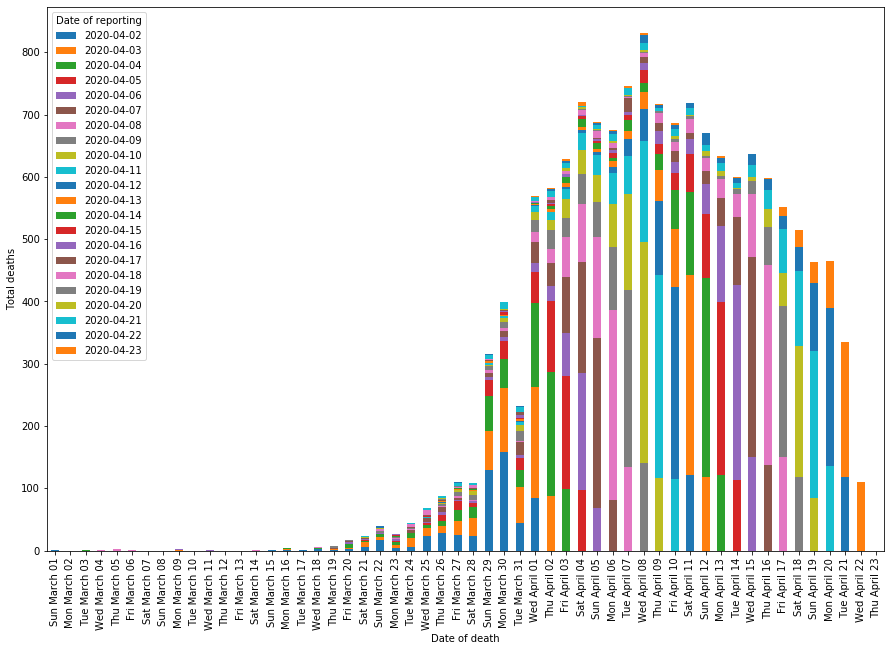

In [48]:
import matplotlib


axes = england.transpose().plot(kind='bar', stacked=True, figsize = [15,10])
axes.set_xlabel("Date of death")
axes.set_ylabel("Total deaths")
axes.legend().set_title("Date of reporting")
formatted_dates = map(lambda x: x.strftime("%a %B %d"), england.columns)
axes.set_xticklabels(formatted_dates);

The next step would be to investigate to what extent this data supports the hypothesis of increased reporting lag at weekends.

However, from the figure it is already clear that the lag in reporting is signficant.

Compare the figure if we show simply the raw reported results per day, as shown at [Worldmeters](https://www.worldometers.info/coronavirus/country/uk/):

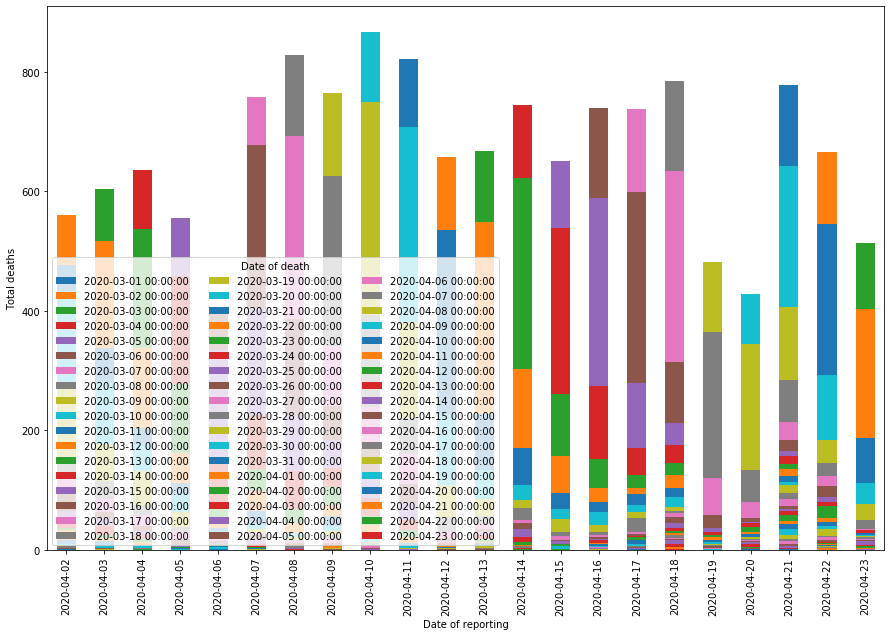

In [49]:
axes = england.plot(kind='bar', stacked=True, figsize = [15,10])
axes.set_xlabel("Date of reporting")
axes.set_ylabel("Total deaths")
axes.legend(ncol=3, loc='lower left', title="Date of death")

It's also worth looking at an individual region. Some have suggested that spatial lag effects (as the virus propagates across the country geographically) can be important. Looking at one region will somewhat control this.

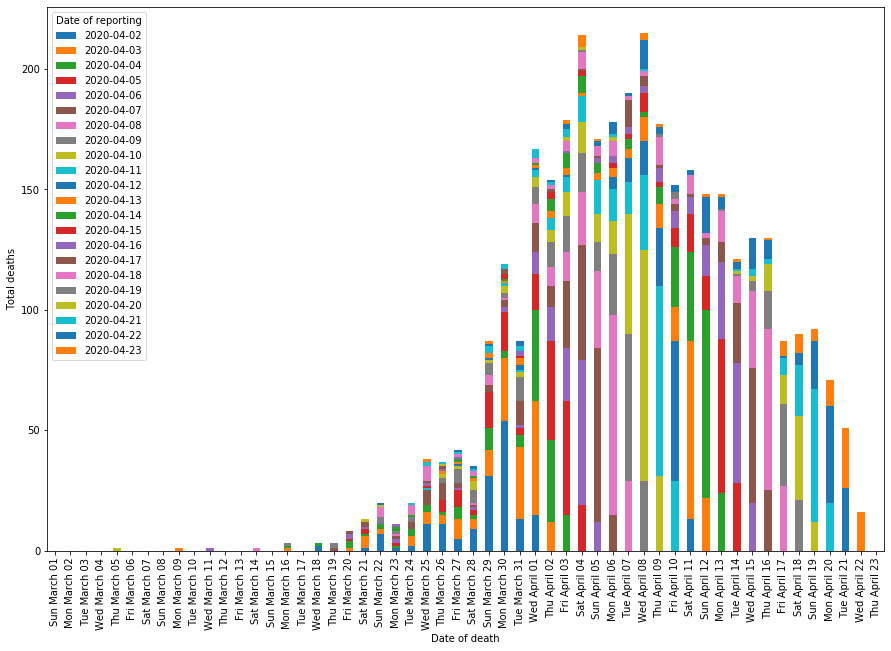

In [50]:
import matplotlib
london = frames.xs('London',level=1)
axes = london.transpose().plot(kind='bar', stacked=True, figsize = [15,10])
axes.set_xlabel("Date of death")
axes.set_ylabel("Total deaths")
axes.legend().set_title("Date of reporting")
formatted_dates = map(lambda x: x.strftime("%a %B %d"), london.columns)
axes.set_xticklabels(formatted_dates);

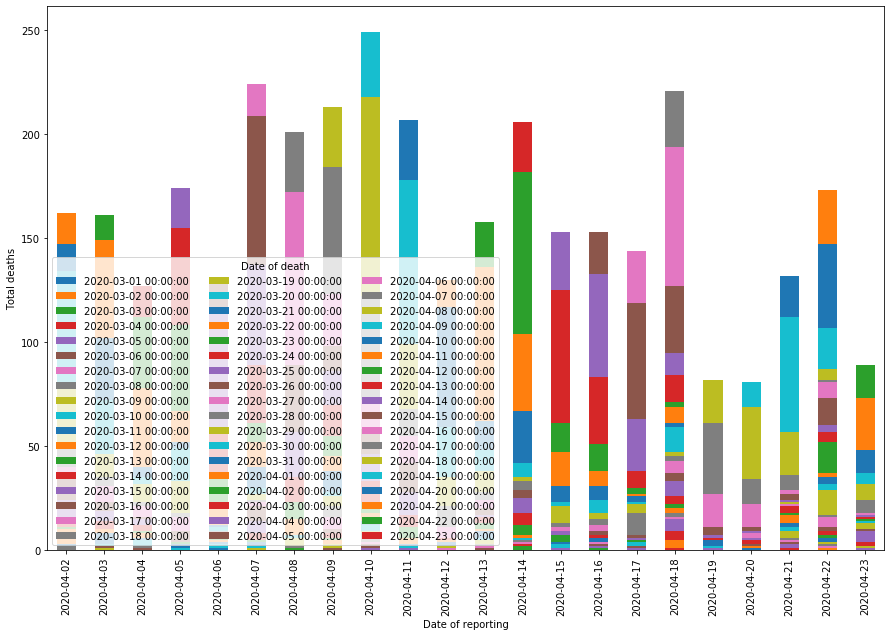

In [51]:
axes = london.plot(kind='bar', stacked=True, figsize = [15,10])
axes.set_xlabel("Date of reporting")
axes.set_ylabel("Total deaths")
axes.legend(ncol=3, loc='lower left', title="Date of death")